# Agriculture_Analysis

# Data Science in Agriculture – Advancing Together & Benefiting Farmers

Data Science in Agriculture – Saving the lives of farmers

Agriculture is the most important sector of the Indian economy, that provides employment to almost half the population of the country’s workforce!! India is the second-largest producer of fruits and vegetables in the world.

Agriculture is the backbone of Indian economy, still, it suffers from a heaping number of disasters such as climate change, unpredictable monsoon or lack of it, droughts, floods, migration of farmers towards the cities in search of better-paying jobs, and more. People involved in agriculture are the last to be taken care of, even when they are the one who feeds the whole country.

With institutions failing to support agriculture in terms of providing loans and farmer welfare schemes, the time has come for technology to take over the change. Data Science is here for the rescue!

# Indian agricultural analysis key points

1. Prediction for farmers opting out from producing certain crops and pre-ferring 
some other crops that has high demand and better yield.
2. Variations of crops over the past in production and yield/area.
3. Reasons for farmers preferring some crops over others.
4. Predictions on crops that might be rarely produced and the main crops that might be preferred by the farmers.

# Important Links:

1. https://www.kaggle.com/abhiseklewan/crop-production-statistics-from-1997-in-india
2. https://data.gov.in/search/site?query=crops
3. https://www.indiastat.com/agriculture-data/2/cost-of-cultivation-production/32320/stats.aspx

# Data reading and cleaning

### 1. Reading the main file for agricultural data:

#### Main DB that has crop area and production information for each state from 1997.

In [148]:
# importing the pyspark libraries

import pyspark 
from pyspark.storagelevel import StorageLevel
from itertools import cycle
from operator import add

import os
#os.environ['HADOOP_HOME'] = r'C:/hadoop'

from pyspark import SparkContext

import pyspark
from pyspark.sql import SparkSession

In [149]:
# creating spark session and appName

spark = SparkSession.builder.appName('Spark-DataFrame-Demo').getOrCreate()

In [150]:
spark

In [151]:
#reading a file from directory

crop_prod = spark.read.load('./AgriData/apy.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [152]:
#display results
crop_prod.show()

+--------------------+-------------+---------+-----------+-------------------+-------+----------+
|          State_Name|District_Name|Crop_Year|     Season|               Crop|   Area|Production|
+--------------------+-------------+---------+-----------+-------------------+-------+----------+
|Andaman and Nicob...|     NICOBARS|     2000|Kharif     |           Arecanut| 1254.0|    2000.0|
|Andaman and Nicob...|     NICOBARS|     2000|Kharif     |Other Kharif pulses|    2.0|       1.0|
|Andaman and Nicob...|     NICOBARS|     2000|Kharif     |               Rice|  102.0|     321.0|
|Andaman and Nicob...|     NICOBARS|     2000|Whole Year |             Banana|  176.0|     641.0|
|Andaman and Nicob...|     NICOBARS|     2000|Whole Year |          Cashewnut|  720.0|     165.0|
|Andaman and Nicob...|     NICOBARS|     2000|Whole Year |           Coconut |18168.0|    6.51E7|
|Andaman and Nicob...|     NICOBARS|     2000|Whole Year |         Dry ginger|   36.0|     100.0|
|Andaman and Nicob..

In [153]:
# display the truncated values from the table
crop_prod.show(truncate=False)

+---------------------------+-------------+---------+-----------+-------------------+-------+----------+
|State_Name                 |District_Name|Crop_Year|Season     |Crop               |Area   |Production|
+---------------------------+-------------+---------+-----------+-------------------+-------+----------+
|Andaman and Nicobar Islands|NICOBARS     |2000     |Kharif     |Arecanut           |1254.0 |2000.0    |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Kharif     |Other Kharif pulses|2.0    |1.0       |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Kharif     |Rice               |102.0  |321.0     |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Whole Year |Banana             |176.0  |641.0     |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Whole Year |Cashewnut          |720.0  |165.0     |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Whole Year |Coconut            |18168.0|6.51E7    |
|Andaman and Nicobar Islands|NICOBARS     |2000     |Wh

In [154]:
#printing the schema
crop_prod.printSchema()

root
 |-- State_Name: string (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Crop_Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- Crop: string (nullable = true)
 |-- Area: double (nullable = true)
 |-- Production: double (nullable = true)



In [155]:
#yearwise Total Production data
from pyspark.sql import functions as F
crop_prod.groupBy(['Crop_Year']).agg(F.sum('Production').alias('Total Production')).show()

+---------+--------------------+
|Crop_Year|    Total Production|
+---------+--------------------+
|     2003| 7.917973504730005E9|
|     2007|     6.87944233858E9|
|     2015|           6935064.7|
|     2006|     8.68191312378E9|
|     2013|1.290358863288000...|
|     1997|        8.51232906E8|
|     2014|     8.66454063111E9|
|     2004| 8.189461694860001E9|
|     1998|      5.8253206404E9|
|     2012|     8.17105474603E9|
|     2009| 7.660494024809999E9|
|     2001| 7.465540840270003E9|
|     2005| 8.043757329740001E9|
|     2000| 7.449709127100003E9|
|     2010| 6.307608525370001E9|
|     2011|1.430890408713000...|
|     2008|     7.71701840216E9|
|     1999|      6.4346659851E9|
|     2002| 7.696955162640007E9|
+---------+--------------------+



In [156]:
#Statewise and Districtwise Production analysis and maximum production in each state.
from pyspark.sql import functions as F
crop_prod.groupBy(['State_Name','District_Name','Crop_Year']).agg(
    F.sum('Production').alias('Total Production'),
    F.max("Production").alias('Max Production')).show()

+----------------+---------------+---------+------------------+--------------+
|      State_Name|  District_Name|Crop_Year|  Total Production|Max Production|
+----------------+---------------+---------+------------------+--------------+
|  Andhra Pradesh|       CHITTOOR|     2010|         2797033.0|     2311342.0|
|  Andhra Pradesh| VISAKHAPATANAM|     2000|       6.3027645E7|   6.0016968E7|
|           Assam|     HAILAKANDI|     2000|          224499.0|      114000.0|
|           Assam|         KAMRUP|     2004|       5.7716582E7|      5.7405E7|
|           Assam|  KARBI ANGLONG|     2002|         2407329.0|     1921000.0|
|           Assam|       SONITPUR|     2012|          938410.0|      237845.0|
|           Bihar|KAIMUR (BHABUA)|     2010|          366288.0|      171037.0|
|           Bihar|         SUPAUL|     2004|          462305.0|       96014.0|
|    Chhattisgarh|       BILASPUR|     2005|          606008.0|      515483.0|
|         Gujarat|   SABAR KANTHA|     2005|        

In [157]:
#Seasonwise Production analysis in each state.
from pyspark.sql import functions as F
crop_prod.groupBy(['State_Name','Season']).agg(
    F.sum('Production').alias('Total Production')).show()

+------------------+-----------+--------------------+
|        State_Name|     Season|    Total Production|
+------------------+-----------+--------------------+
|             Bihar|Rabi       |        1.03402165E8|
|           Tripura|Kharif     |         1.1036883E7|
|           Manipur|Kharif     |           3619792.0|
|        Chandigarh|Kharif     |              8224.0|
|          Nagaland|Kharif     |         1.0143947E7|
|        Tamil Nadu|Kharif     |1.3081457472999999E8|
|    Andhra Pradesh|Rabi       |         9.8156193E7|
|             Assam|Kharif     |          1.578285E7|
|       West Bengal|Summer     |         8.2170893E7|
|Jammu and Kashmir |Kharif     |           9070244.8|
|          Nagaland|Rabi       |           1378761.0|
|  Himachal Pradesh|Kharif     |        1.01342075E7|
|            Punjab|Kharif     |        2.17036762E8|
|       West Bengal|Kharif     |        1.52126828E8|
|               Goa|Kharif     |          1151845.58|
|    Madhya Pradesh|Kharif  

In [158]:
#filling 0 to the null values in the data for future analysis

crop_prod=crop_prod.fillna(0)


In [159]:
#checking the type of data
type(crop_prod)

pyspark.sql.dataframe.DataFrame

In [160]:
crop_prod = crop_prod.limit(100).toPandas()

In [161]:
crop_prod

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00
...,...,...,...,...,...,...,...
95,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Dry ginger,344.0,1124.00
96,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Sugarcane,81.0,2379.00
97,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Sweet potato,100.0,5.00
98,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Kharif,Rice,6854.3,18995.62


In [162]:
#sorting the values based on State_Name and cropwise 
crop_prod.sort_values(by=crop_prod.columns[0])
states = sorted(set(crop_prod.iloc[:,0].values))
crop_prod

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00
...,...,...,...,...,...,...,...
95,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Dry ginger,344.0,1124.00
96,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Sugarcane,81.0,2379.00
97,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Sweet potato,100.0,5.00
98,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Kharif,Rice,6854.3,18995.62


#### Representing the sample production data to visualze in charts

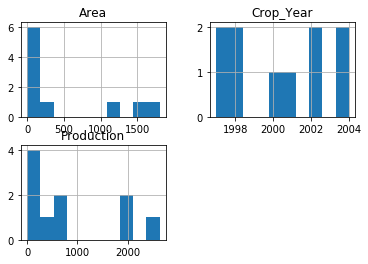

In [163]:
# import pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt 
  
# create 2D array of table given above 
data = [['Andaman and Nicobar Islands', 'NICOBARS', 2000, 'Kharif', 'Arecanut', 1254,2000], 
        ['Andaman and Nicobar Islands', 'NICOBARS', 2002, 'Kharif', 'Other Kharif pulses', 2,1], 
        ['Andaman and Nicobar Islands', 'NICOBARS', 2001, 'Kharif', 'rice', 102,321], 
        ['Andaman and Nicobar Islands', 'NICOBARS', 1998, 'Kharif', 'Banana', 176,641], 
        ['Andhra Pradesh', 'ANANTAPUR', 1997, 'Kharif', 'Dry chillies', 1540,1890],
        ['Andhra Pradesh', 'ANANTAPUR', 1997, 'rabi', 'Dry chillies', 100,100],
        ['Andhra Pradesh', 'ANANTAPUR', 1998, 'rabi', 'Bajra', 1800,2637],
        ['Andhra Pradesh', 'ANANTAPUR', 2002, 'rabi', 'ragi', 18,19],
        ['Assam', 'BASKA', 2004, 'Autumn', 'Castor seed', 318,543],
        ['Andhra Pradesh', 'DUBRI', 2004, 'rabi', 'Small Mill', 180,190]
       
       ] 
  
# dataframe created with 
# the above data array 
df = pd.DataFrame(data, columns = ['State_Name', 'District_Name',  
                                    'Crop_Year', 'Season', 
                                    'Crop', 'Area','Production'] ) 
  
# create histogram for numeric data 
df.hist() 
  
# show plot 
plt.show()

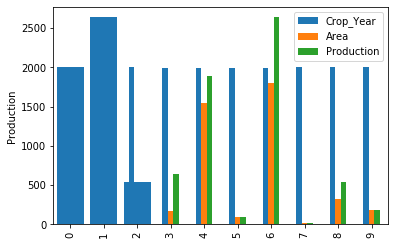

In [164]:
# Dataframe of previous code is used here 
  
# Plot the bar chart for numeric values 
# a comparison will be shown between 
# all 3 Crop_Year, Area, Production 
df.plot.bar() 
  
# plot between 2 attributes 
plt.bar(df['Season'],df['Production']) 
plt.ylabel("Production") 
plt.show() 

### 2. Reading the DB with wholesale price of crops over the years.

1. Commodities are crop
2. The prices are in Rupees / Quintal

In [165]:
#Loadind data
crop_price = spark.read.load('./AgriData/Crops_price.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [166]:
crop_price.show()

+--------------------+----+----+----+------+------+------+------+------+----+----+
|Commodities(rs/quin)|2002|2004|2005|  2006|  2007|  2008|  2009|  2010|2011|2012|
+--------------------+----+----+----+------+------+------+------+------+----+----+
|     Paddy (Common) | 550| 560| 570| 580.0| 645.0| 850.0| 950.0|1000.0|1080|1250|
|  Paddy (Grade ‘A’) | 580| 590| 600| 610.0| 675.0| 880.0| 980.0|1030.0|1110|1280|
|              Wheat | 630| 640| 650| 750.0|1000.0|1080.0|1100.0|1120.0|1285|1350|
|      Jowar (Hybrid)| 490| 515| 525| 540.0| 600.0| 840.0| 840.0| 880.0| 980|1500|
|    Jowar (Maldandi)| ...| ...| ...| 555.0| 620.0| 860.0| 860.0| 900.0|1000|1520|
|               Bajra| 495| 515| 525| 540.0| 600.0| 840.0| 840.0| 880.0| 980|1175|
|                Ragi| 490| 515| 525| 540.0| 600.0| 915.0| 915.0| 965.0|1050|1500|
|              Maize | 490| 525| 540| 540.0| 620.0| 840.0| 840.0| 880.0| 980|1175|
|             Barley | 505| 540| 550| 565.0| 650.0| 680.0| 750.0| 780.0| 980| 980|
|   

In [167]:
crop_price = crop_price.limit(50).toPandas()

In [168]:
# filling null to 0 values and converting to float type
import pandas as pd
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)

In [169]:
crop_price

,Commodities(rs/quin),2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550.0,560.0,570.0,580.00,645.00,850.00,950.00,1000.00,1080,1250.0
1,Paddy (Grade ‘A’),580.0,590.0,600.0,610.00,675.00,880.00,980.00,1030.00,1110,1280.0
2,Wheat,630.0,640.0,650.0,750.00,1000.00,1080.00,1100.00,1120.00,1285,1350.0
3,Jowar (Hybrid),490.0,515.0,525.0,540.00,600.00,840.00,840.00,880.00,980,1500.0
4,Jowar (Maldandi),0.0,0.0,0.0,555.00,620.00,860.00,860.00,900.00,1000,1520.0
5,Bajra,495.0,515.0,525.0,540.00,600.00,840.00,840.00,880.00,980,1175.0
6,Ragi,490.0,515.0,525.0,540.00,600.00,915.00,915.00,965.00,1050,1500.0
7,Maize,490.0,525.0,540.0,540.00,620.00,840.00,840.00,880.00,980,1175.0
8,Barley,505.0,540.0,550.0,565.00,650.00,680.00,750.00,780.00,980,980.0
9,Gram,1225.0,1425.0,1435.0,1445.00,1600.00,1730.00,1760.00,2100.00,2800,3000.0


In [170]:
# Renaming the columns Commodities(rs/quin) to Commodities
crop_price = crop_price.rename(columns = {'Commodities(rs/quin)':'Commodities'})

In [171]:
crop_price

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Paddy (Common),550.0,560.0,570.0,580.00,645.00,850.00,950.00,1000.00,1080,1250.0
1,Paddy (Grade ‘A’),580.0,590.0,600.0,610.00,675.00,880.00,980.00,1030.00,1110,1280.0
2,Wheat,630.0,640.0,650.0,750.00,1000.00,1080.00,1100.00,1120.00,1285,1350.0
3,Jowar (Hybrid),490.0,515.0,525.0,540.00,600.00,840.00,840.00,880.00,980,1500.0
4,Jowar (Maldandi),0.0,0.0,0.0,555.00,620.00,860.00,860.00,900.00,1000,1520.0
5,Bajra,495.0,515.0,525.0,540.00,600.00,840.00,840.00,880.00,980,1175.0
6,Ragi,490.0,515.0,525.0,540.00,600.00,915.00,915.00,965.00,1050,1500.0
7,Maize,490.0,525.0,540.0,540.00,620.00,840.00,840.00,880.00,980,1175.0
8,Barley,505.0,540.0,550.0,565.00,650.00,680.00,750.00,780.00,980,980.0
9,Gram,1225.0,1425.0,1435.0,1445.00,1600.00,1730.00,1760.00,2100.00,2800,3000.0


#### Represting the wholesale price of crops in plots

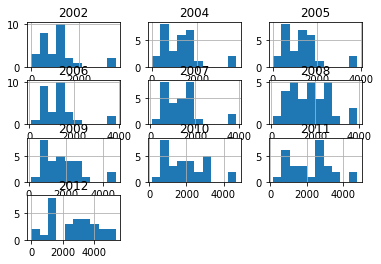

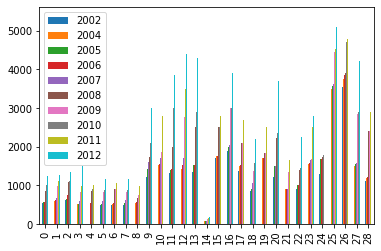

In [172]:
# import pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt 
  
# create 2D array of table given above 
data = crop_price.loc[0:] 
  
# dataframe created with 
# the above data array 
df1 = pd.DataFrame(data) 
  
# create histogram for numeric data 
df1.hist() 
  
# show plot 
plt.show()

df1.plot.bar() 
  
plt.show() 

### Visualizing databases :

#### Crop prices data

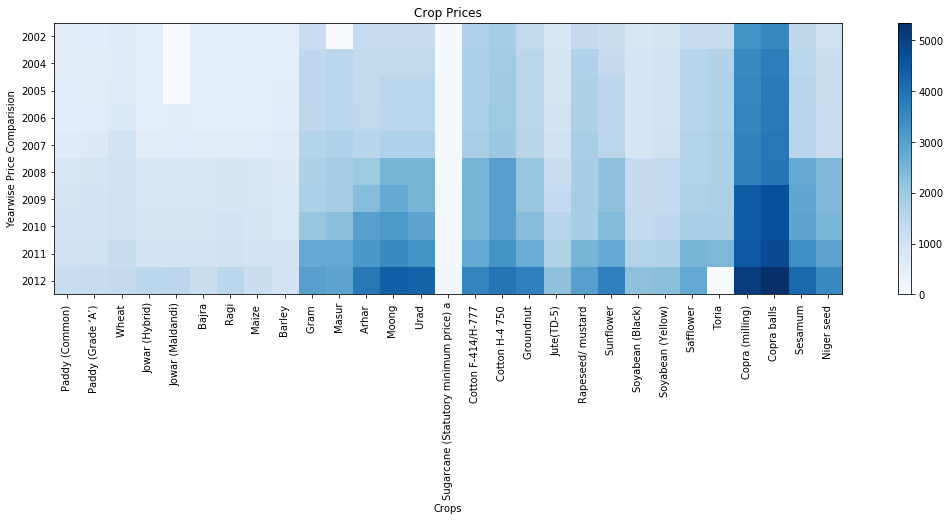

In [173]:
import numpy as np
# from matplotlib import plt
import matplotlib.pylab as plt

#taking all the input values
mat1 = np.matrix(crop_price.values[:,1:],dtype='float')
#setting the size of the graph
fig = plt.figure(num=2,figsize=(20,5))
ax = fig.add_subplot(1,1,1)
plt.imshow(mat1.T, cmap='Blues')
#assiging x and y axis values
ax.set_yticks(np.arange(len(crop_price.columns[1:])))
ax.set_xticks(np.arange(len(crop_price.iloc[:,0])))
ax.set_yticklabels(crop_price.columns[1:])
ax.set_xticklabels(crop_price.iloc[:,0],rotation='vertical')
#labels for x and y axis
plt.xlabel('Crops')
plt.ylabel('Yearwise Price Comparision')
plt.colorbar()
#Title for map
plt.title('Crop Prices')
plt.show()
#mplot.show()

### 3. Including DB for area under cultivation for major crops

In [174]:
#loading area under cultivation data
area_cult= spark.read.load('./AgriData/area_cult.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [175]:
area_cult = area_cult.limit(10).toPandas()

In [176]:
area_cult

,Year,Rice,Jowar,Bajra,Maize,Ragi,Small millets,Wheat,Barley,Gram,...,Rubber,Banana,Sugarcane,Tobacco,Potato,Black pepper,Dry chillies,Ginger,Coconut,Turmeric
0,2000,44712,9856,9829,6611,1759,1424,25731,778,5185,...,400,459,4316,262,1222,214,836,86,1824,192
1,2001,44904,9795,9529,6582,1647,1310,26345,660,6416,...,401,489,4412,348,1208,219,880,91,1932,167
2,2002,41176,9300,7740,6635,1415,1201,25196,702,5906,...,408,460,4520,327,1345,224,827,88,1922,150
3,2003,42593,9331,10612,7343,1666,1191,26595,657,7048,...,428,391,3938,370,1289,233,774,85,1934,150
4,2004,41907,9092,8233,7430,1553,1101,26383,616,6715,...,440,404,3662,366,1318,228,738,95,1935,159
5,2005,43660,8667,9581,7588,1534,1064,26484,630,6926,...,447,424,4202,373,1401,260,654,111,1947,172
6,2006,43814,8472,9508,7894,1177,1010,27994,646,7494,...,454,477,5151,369,1484,246,763,106,1937,178
7,2007,43914,7764,9571,8117,1387,1039,28039,603,7544,...,459,658,5055,348,1553,197,806,104,1903,175
8,2008,45537,7531,8752,8174,1381,905,27752,706,7892,...,463,709,4415,391,1828,239,779,109,1903,181
9,2009,41918,7787,8904,8261,1268,831,28457,624,8169,...,468,770,4175,444,1835,197,767,107,1895,180


### Area under cultivation data

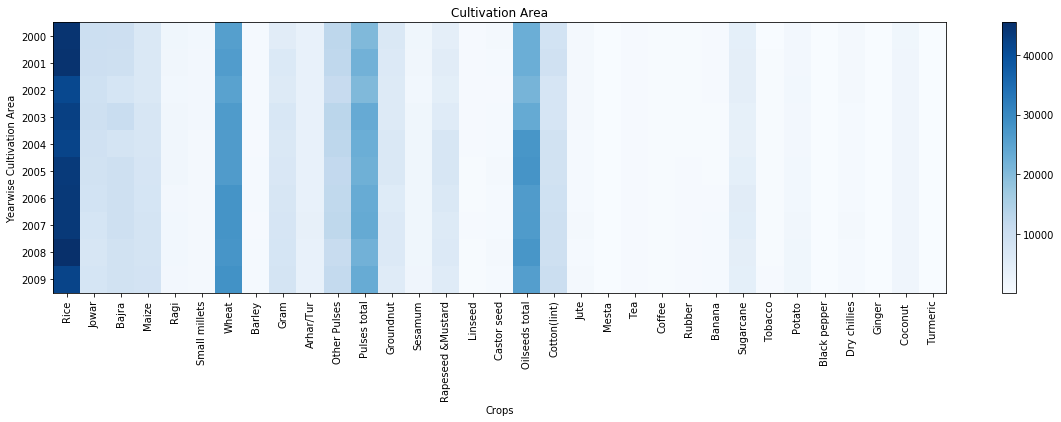

In [177]:
import numpy as np
# from matplotlib import plt
import matplotlib.pylab as plt

#taking all the input values
mat2 = np.matrix(area_cult.values[:,1:],dtype='float')
# print(mat2.shape)
mat2=np.delete(mat2,12,1)
# print(mat2.shape)
#setting the size of the graph
fig = plt.figure(num=3,figsize=(20,5))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
#assiging x and y axis values
ax.set_xticks(np.arange(len(np.delete(area_cult.columns[1:],12))))
ax.set_yticks(np.arange(len(area_cult.iloc[:,0])))
ax.set_xticklabels(np.delete(area_cult.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult.iloc[:,0])
plt.imshow(mat2, cmap='Blues')
#labels for x and y axis
plt.xlabel('Crops')
plt.ylabel('Yearwise Cultivation Area')
plt.colorbar()
plt.title('Cultivation Area')
plt.show()

### 4. Reading database for cost of cultivation of crops in that state

Information is in three parts :
1. A2 (actual paid out cost), A2+FL (actual paid out cost plus imputed value of family labour)
2. C2 (comprehensive cost including imputed rent and interest on owned land and capital).
3. Cost of production per quintal.

In [178]:
#loading cost of cultivation of crops data
culti_cost= spark.read.load('./AgriData/culti_cost.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [179]:
culti_cost= culti_cost.limit(10).toPandas()

In [180]:
culti_cost

,Crop,State/ UT Name,Cost of Cultivation (`/Hectare) - A2+FL - 2008-09,Cost of Cultivation (`/Hectare) - A2+FL - 2009-10,Cost of Cultivation (`/Hectare) - A2+FL - 2010-11,Cost of Cultivation (`/Hectare) - A2+FL - 2011-12,Cost of Cultivation (`/Hectare) - A2+FL - 2012-13,Cost of Cultivation (`/Hectare) - A2+FL - 2013-14,Cost of Cultivation(`/Hectare) - C2 - 2008-09,Cost of Cultivation(`/Hectare) - C2 - 2009-10,Cost of Cultivation(`/Hectare) - C2 - 2010-11,Cost of Cultivation(`/Hectare) - C2 - 2011-12,Cost of Cultivation (`/Hectare) - C2 - 2012-13,Cost of Cultivation (`/Hectare) - C2 - 2013-14,Cost of Production (`/Quintal) - C2 - 2008-09,Cost of Production (`/Quintal) - C2 - 2009-10,Cost of Production (`/Quintal) - C2 - 2010-11,Cost of Production (`/Quintal) - C2 - 2011-12,Cost of Production (`/Quintal) - C2 - 2012-13,Cost of Production (`/Quintal) - C2 - 2013-14
0,Paddy,Andhra Pradesh,29664.84,35104.80,35090.78,37946.69,42669.85,46781.05,46450.2,54202.54,51505.34,58027.19,68149.69,72417.05,789.90,932.50,916.98,976.36,1135.01,1248.20
1,Paddy,Odisha,17478.05,19175.75,21894.98,27243.15,31723.25,35569.85,25909.05,28143.88,30318.40,35972.50,44091.78,46839.15,715.04,793.65,955.59,1221.44,1159.54,1408.40
2,Paddy,Punjab,25154.75,29031.73,30793.25,31248.72,37103.96,39686.81,45291.24,50650.21,51279.34,53813.93,64811.36,68382.86,669.86,773.18,836.46,904.30,945.73,1043.27
3,Paddy,Uttar Pradesh,17022.00,21336.61,21281.30,28147.45,29436.98,30982.85,28144.5,32327.78,32299.35,40146.68,43620.87,45617.43,732.62,812.97,806.87,957.83,1019.43,1031.23
4,Paddy,West Bengal,24731.06,28101.85,32872.72,37959.78,42770.22,45783.94,33046.12,38111.55,43019.85,49142.99,55982.79,60924.19,731.25,865.12,1022.83,1085.76,1236.05,1366.80
5,Wheat,Haryana,20063.32,22382.77,22943.95,27745.15,31895.91,34595.63,37450.75,41692.91,42323.07,51170.51,54067.45,60738.72,716.55,832.45,773.05,850.66,1047.78,1051.61
6,Wheat,Madhya Pradesh,12464.40,13355.12,15504.33,17871.12,20973.23,21784.93,22489.75,24217.75,27532.33,33396.15,37119.94,37655.11,810.25,808.48,834.21,851.95,958.95,1078.96
7,Wheat,Punjab,17945.58,20222.99,23063.23,25711.09,26559.35,30219.61,35423.48,38282.74,42983.98,49298.84,49518.78,55202.93,804.80,816.89,871.74,888.55,981.21,970.47
8,Wheat,Rajasthan,19119.08,20276.87,19595.57,26920.58,30345.62,33958.67,29876.36,31794.11,31630.89,40286.20,46942.45,53014.68,683.58,709.16,666.87,825.94,920.63,1036.32
9,Wheat,Uttar Pradesh,18979.38,20776.26,22306.96,26001.27,28062.10,30207.17,31902.74,33574.70,35984.44,42383.57,44383.07,46415.97,769.84,832.96,803.68,930.55,1058.98,1074.57


### Cultivation cost of major crops per quintal in that state:

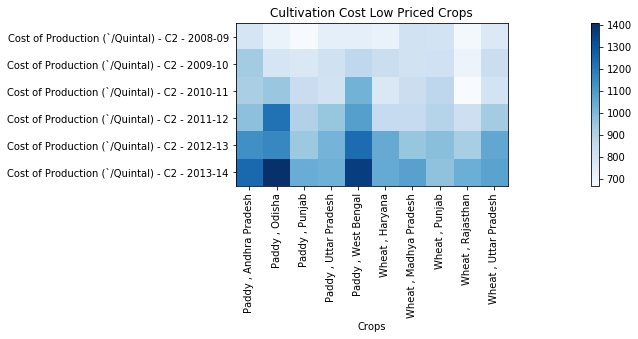

In [181]:
import numpy as np
# from matplotlib import plt
import matplotlib.pylab as plt
#taking all the input values and transposing
mat3 = np.matrix(culti_cost.values[:,14:],dtype='float').T
#setting the size of the graph
fig = plt.figure(num=4,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
#assiging x and y axis values
#labels for x and y axis
ax.set_yticks(np.arange(len(culti_cost.columns[14:])))
ax.set_xticks(np.arange(len(culti_cost.values[:,0]+' , '+culti_cost.values[:,1])))
ax.set_yticklabels(culti_cost.columns[14:])
ax.set_xticklabels(culti_cost.values[:,0]+' , '+culti_cost.values[:,1],rotation='vertical')
plt.imshow(mat3, cmap='Blues')
plt.xlabel('Crops')
plt.colorbar()
plt.title('Cultivation Cost Low Priced Crops')
plt.show()

### 5. Reading mean temperatures over the years from database

In [182]:
#Loading temperatures data 
temperature = spark.read.load('./AgriData/Mean_Temperatures.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [183]:
temperature = temperature.limit(20).toPandas()

In [184]:
temperature

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,2000,24.60,19.33,26.47,27.23,22.68
1,2001,24.73,19.75,26.82,27.47,22.52
2,2002,25.00,19.65,27.22,27.71,22.58
3,2003,24.72,19.82,26.52,27.64,22.23
4,2004,24.74,19.93,27.06,27.33,22.24
5,2005,24.58,19.79,26.33,27.64,21.93
6,2006,25.06,21.36,26.52,27.40,22.66
7,2007,24.77,20.10,26.69,27.49,22.32
8,2008,24.61,19.16,26.46,27.26,22.86
9,2009,25.11,20.72,26.86,27.89,22.58


### Visualizing of data for mean temperature over the years

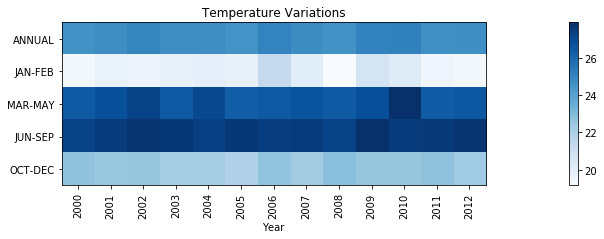

In [185]:
import numpy as np
# from matplotlib import plt
import matplotlib.pylab as plt

mat4 = np.matrix(temperature.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(temperature.columns[1:])))
ax.set_xticks(np.arange(len(temperature.values[:,0])))
ax.set_yticklabels(temperature.columns[1:])
ax.set_xticklabels(temperature.values[:,0].astype(int),rotation='vertical')
plt.imshow(mat4, cmap='Blues')
plt.colorbar()
plt.xlabel('Year')
plt.title('Temperature Variations')
plt.show()

### 6. Reading data for growth rate of major crops over the years

In [186]:
#Loading annual growth data
growth = spark.read.load('./AgriData/Avg annual Growth Rate_Major Crops.csv', format = "csv", sep = ",", inferSchema = "True", header="True")

In [187]:
growth = growth.limit(50).toPandas()

In [188]:
import pandas as pd
growth = pd.concat([growth.iloc[:,0],growth.iloc[:,5:]],axis=1,sort=False)
growth = growth.dropna()

In [189]:
growth 

,Crop,(Ninth Plan) 1997-98 to 2001-02,(Tenth Plan) 2002-03 to 2006-07,(Eleventh Plan) 2007-08 to 2011-12
0,Wheat,0.7,-0.3,3.0
1,Rice,2.1,1.2,2.2
2,Jowar,0.2,2.1,3.1
3,Bajra,4.9,7.3,8.4
4,Maize,3.1,-0.2,6.5
5,Coarse cereals,1.3,1.7,7.3
6,Pulses,-0.3,0.6,2.7
7,Oilseeds,0.4,3.5,5.4
8,Cotton,-6.2,19.4,3.9
9,Sugarcane,0.3,0.7,0.5


### Visualizing growth rate data

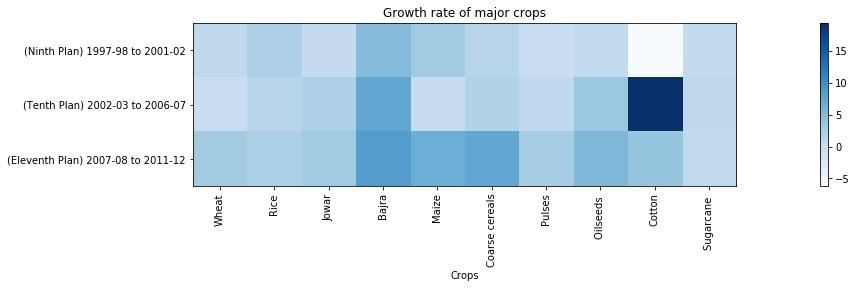

In [190]:
import numpy as np
# from matplotlib import plt
import matplotlib.pylab as plt

mat5 = np.matrix(growth.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(30,3))
ax = fig.add_subplot(1,1,1)
ax.set_yticks(np.arange(len(growth.columns[1:])))
ax.set_xticks(np.arange(len(growth.values[:,0])))
ax.set_yticklabels(growth.columns[1:])
ax.set_xticklabels(growth.values[:,0],rotation='vertical')
plt.imshow(mat5, cmap='Blues')
plt.xlabel('Crops')
plt.colorbar()
plt.title('Growth rate of major crops')
plt.show()

#### 9. Reading Exports data for various products over the years

In [191]:
exports = pd.read_csv('./AgriData/IndiaExport.csv',delimiter=',')
to_drop = []
for head in exports.columns[1:]:
    if 'Unn' in head:
        to_drop.append(head)
exports.drop(columns = to_drop,inplace=True)
exports = exports.drop(0)
exports.rename(columns = {'Unnamed: 0':'Product'},inplace = True)
for_plot = exports.copy()
exports = exports.melt(id_vars='Product')
exports.variable = exports.variable.astype(int)
exports.value = exports.value.astype(float)
exports.head()

,Product,variable,value
0,Buffalo Meat,2003,343817.08
1,Basmati Rice,2003,771475.37
2,Rice,2003,2640438.93
3,Guargum,2003,120561.27
4,Wheat,2003,4093080.52


#### Selecting data related only to Agro based products

In [192]:
#selection agri based product data from the file
plot_exports=for_plot.copy()
plot_exports=plot_exports.reset_index(drop=True)
to_drop=[]
ct=0
for head in plot_exports.Product:
    if 'Meat' in head:
        to_drop.append(head)
        plot_exports.drop(ct,inplace=True)
    ct+=1
plot_exports.drop([9,15,23,26,29,32],inplace=True)
plot_exports = plot_exports.reset_index(drop=True)
plot_exports.Product[plot_exports.Product=='Cucumber and Gherkins( Prepd. & Presvd)'] = 'Cucumber and Gherkins'
plot_exports.head()

,Product,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Basmati Rice,771475.37,1162989.16,1166562.79,1045714.95,1183355.73,1556411.06,2016775,2370658.39,3178174.43,3459898.93,3757271.42,3702260.07
1,Rice,2640438.93,3615109.55,2921601.91,3702191.99,5285916.33,931879.8,139540.76,100685.78,3997719.57,6687990.85,7133183.37,8274046.02
2,Guargum,120561.27,131299.98,186718.4,189304.36,211166.56,258567.56,218479.74,441607.7,707326.43,406311.81,601945.42,665177.71
3,Wheat,4093080.52,2009343.03,746173.23,46633.21,237.27,1120.52,47.3,394.47,740746.76,6514810.6,5562374.74,2924070.18
4,Groundnuts,176109.32,177154.08,190053.34,251428.65,269587.64,297890.37,340246.31,433753.23,832616.93,535637.36,509664.84,708386.26


#### Visualising exports of agro based products

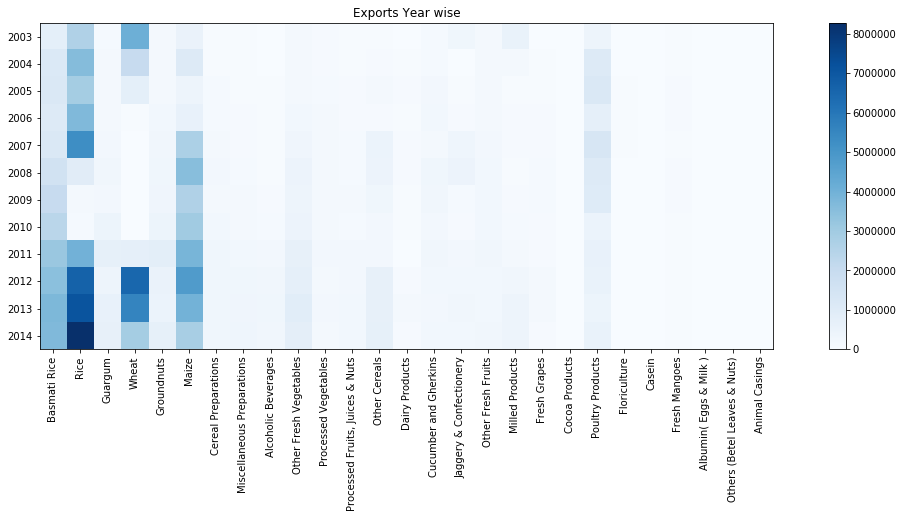

In [193]:
#Transposing the export data
mat6 = np.matrix(plot_exports.values[:,1:],dtype='float').T
fig = plt.figure(num=5,figsize=(20,6))
ax = fig.add_subplot(1,1,1)
#setting x and y axis
ax.set_yticks(np.arange(len(plot_exports.columns[1:])))
ax.set_xticks(np.arange(len(plot_exports.values[:,0])))
ax.set_yticklabels(plot_exports.columns[1:])
ax.set_xticklabels(plot_exports.values[:,0],rotation='vertical')
plt.imshow(mat6, cmap='Blues')
plt.colorbar()
plt.title('Exports Year wise')
plt.show()

#### Separating area data from the main data table

In [194]:
area = crop_prod.copy()
#considerind the crop prodction data after the year 2000
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
area.drop(columns={'Production'},inplace=True)
area = area.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).sum()
area.head()

,State_Name,Crop_Year,Crop,Area
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,670.0
2,Andaman and Nicobar Islands,2000,Rice,10881.0
3,Andaman and Nicobar Islands,2000,Banana,1707.0
4,Andaman and Nicobar Islands,2000,Cashewnut,800.0


#### Separating production data from main data table

In [195]:
production = pd.concat([crop_prod.iloc[:,0:5],crop_prod.iloc[:,6:7]],axis=1)
# separating the production data after 2000 to anyalize statewise data
production = production.loc[production.loc[:,'Crop_Year'] >=2000,:]
# production.drop(columns={'Production'},inplace=True)
production = production.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).sum()
production.Crop[production.Crop == 'Paddy'] = 'Rice'
production.Crop[production.Crop == 'Moong(Green Gram)'] = 'Moong'
production.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,State_Name,Crop_Year,Crop,Production
0,Andaman and Nicobar Islands,2000,Arecanut,7200.0
1,Andaman and Nicobar Islands,2000,Other Kharif pulses,449.0
2,Andaman and Nicobar Islands,2000,Rice,32184.0
3,Andaman and Nicobar Islands,2000,Banana,12714.0
4,Andaman and Nicobar Islands,2000,Cashewnut,219.0


#### Converting the names in required form in both area and crop price table

In [ ]:
#Converting the names in required form in both area and crop price 
area.Crop[area.Crop == 'Paddy'] = 'Rice'
area.Crop[area.Crop == 'Moong(Green Gram)'] = 'Moong'
list_area= area.Crop.unique()
list_price= crop_price.Commodities.unique()
for item in list_price:
    if 'Paddy' in item:
        crop_price.Commodities[crop_price.Commodities == item]='Rice'
for item in list_price:
    for item_area in list_area:
        if item.strip() in item_area or item_area.strip() in item:
            if item != item_area:
                crop_price.Commodities[crop_price.Commodities == item]=item_area
crop_price.Commodities[crop_price.Commodities == 'Cotton F-414/H-777 ']='Cotton(lint)'
crop_price.Commodities[crop_price.Commodities == 'Cotton H-4 750 ']='Cotton(lint)'
crop_price.Commodities[crop_price.Commodities == 'Paddy']='Rice'
crop_price = crop_price.groupby(['Commodities'],as_index=False,sort=False).sum()
# crop_price.head()

In [197]:
area_price=area.iloc[:,1:]
area_price = area_price.groupby(['Crop_Year','Crop'],as_index=True,sort=False).sum()
area_price = area_price.iloc[:,:].unstack(level=0).reset_index()
area_price = area_price.fillna(0)
area_price.columns = area_price.columns.droplevel()
area_price.rename(columns={'':'Crop'},inplace=True)
area_price = area_price[area_price['Crop'].isin(crop_price.Commodities)].sort_values(by='Crop')
area_price.drop(columns={2000,2001,2003},inplace=True)
area_price.columns = area_price.columns.astype(str)
#area_price = area_price.reindex_axis(sorted(area_price.columns), axis=1)
#temp = area_price.iloc[:,1:].reindex_axis(sorted(area_price.iloc[:,1:].columns), axis=1)
area_price.head()

Crop_Year,Crop,2002,2004,2005,2006,2010
14,Maize,0.0,0.00,0.00,0.0,3.84
15,Moong,0.0,0.00,0.00,0.0,1.50
2,Rice,189.2,52.94,2.09,6854.3,3.50
7,Sugarcane,5.0,0.00,0.00,0.2,13.40
16,Urad,0.0,0.00,0.00,0.0,1.50


In [198]:
# Selecting the names of crops that are present in both area_price and crop_price table
crop_price = crop_price[crop_price['Commodities'].isin(area_price.Crop)].sort_values(by='Commodities')
crop_price.head()

,Commodities,2002,2004,2005,2006,2007,2008,2009,2010,2011,2012
6,Maize,490.0,525.0,540.0,540.00,620.00,840.00,840.00,880.00,980,1175.0
11,Moong,1335.0,1410.0,1520.0,1520.00,1700.00,2520.00,2760.00,3170.00,3500,4400.0
0,Rice,1130.0,1150.0,1170.0,1190.00,1320.00,1730.00,1930.00,2030.00,2190,2530.0
13,Sugarcane,69.5,74.5,79.5,80.25,81.18,81.18,129.84,139.12,145,170.0
12,Urad,1335.0,1410.0,1520.0,1520.00,1700.00,2520.00,2520.00,2900.00,3300,4300.0


#### Visualizing the area under cultivation for crops year wise

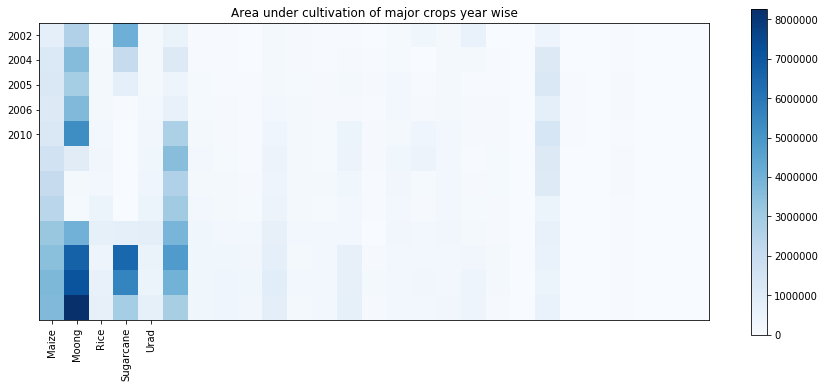

In [199]:
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import numpy as np

years= area_price.columns[1:]
fig = plt.figure(num=5,figsize=(15,6))
ax1 = fig.add_subplot(111)
ax1.set_yticks(np.arange(len(area_price.columns[1:])))
ax1.set_xticks(np.arange(len(area_price.values[:,0])))
ax1.set_yticklabels(area_price.columns[1:])
ax1.set_xticklabels(area_price.values[:,0],rotation='vertical')
plt.imshow(mat6, cmap='Blues')
plt.colorbar()
plt.title('Area under cultivation of major crops year wise')
plt.show()

#### Converting production data to compare it from price data

In [200]:
production_year=production.iloc[:,1:]
production_year = production_year.groupby(['Crop_Year','Crop'],as_index=True,sort=False).sum()
production_year = production_year.iloc[:,:].unstack(level=0).reset_index()
production_year = production_year.fillna(0)
production_year.columns = production_year.columns.droplevel()
production_year.rename(columns={'':'Crop'},inplace=True)
production_year = production_year[production_year['Crop'].isin(crop_price.Commodities)].sort_values(by='Crop')
#droping the data for 2000,01,03 due to insufficient data
production_year.drop(columns={2000,2001,2003},inplace=True)
production_year.columns = production_year.columns.astype(str)
#production_year = production_year.reindex_axis(sorted(production_year.columns), axis=1)
production_year.head()

Crop_Year,Crop,2002,2004,2005,2006,2010
14,Maize,0.00,0.00,0.00,0.00,18.22
15,Moong,0.00,0.00,0.00,0.00,1.10
2,Rice,510.84,72.57,12.06,18995.62,10.00
7,Sugarcane,40.00,0.00,0.00,0.50,41.75
16,Urad,0.00,0.00,0.00,0.00,1.16


In [201]:
# Areawise crop prices
print(area_price.iloc[:,:area_price.shape[1]-1].reset_index(drop=True))

Crop_Year       Crop   2002   2004  2005    2006
0              Maize    0.0   0.00  0.00     0.0
1              Moong    0.0   0.00  0.00     0.0
2               Rice  189.2  52.94  2.09  6854.3
3          Sugarcane    5.0   0.00  0.00     0.2
4               Urad    0.0   0.00  0.00     0.0


In [202]:
# Cropwise Production
print(production_year.iloc[:,:area_price.shape[1]-1].reset_index(drop=True))

Crop_Year       Crop    2002   2004   2005      2006
0              Maize    0.00   0.00   0.00      0.00
1              Moong    0.00   0.00   0.00      0.00
2               Rice  510.84  72.57  12.06  18995.62
3          Sugarcane   40.00   0.00   0.00      0.50
4               Urad    0.00   0.00   0.00      0.00


### Converting all data to merge into one table and then saving it in a csv file

In [203]:
#converting data and merging to one table
#Crop Production Data
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
# area.drop(columns={'Production'},inplace=True)
area = area.groupby(['Crop_Year','Crop'],as_index=False,sort=False).sum()
# area_temp = area.drop(columns = 'Crop')
# area_temp = area_temp.groupby(['State_Name','Crop_Year'],as_index=False,sort=False).sum()
area_temp=area.copy()
# area_temp.shape,temp_rain.shape
# area_temp.head()

In [204]:
#Tempareture Data
area_heat =pd.merge(area_temp.rename(columns={"Crop_Year": "YEAR"}),temperature.iloc[:,0:2],how='inner',sort=False)
area_heat['Ratio'] = area_heat.Production/area_heat.Area
# area_heat.head()

In [205]:
# Area Data
area = crop_prod.copy()
area = area.loc[area.loc[:,'Crop_Year'] >=2000,:]
# area.drop(columns={'Production'},inplace=True)
area = area.groupby(['State_Name','Crop_Year','Crop'],as_index=False,sort=False).sum()
area_temp=area.copy()
area_temp.iloc[:,0]=area_temp.iloc[:,0].str.upper()
area_temp.State_Name[area_temp.State_Name == 'ANDAMAN AND NICOBAR ISLANDS'] = 'ANDAMAN & NICOBAR ISLANDS'
area_temp.State_Name[area_temp.State_Name == 'JAMMU AND KASHMIR '] = 'JAMMU & KASHMIR'
area_temp.State_Name[area_temp.State_Name == 'ODISHA'] = 'ORISSA'
area_temp.State_Name[area_temp.State_Name == 'TELANGANA '] = 'TELANGANA'
area_temp.Crop[area_temp.Crop=='Paddy'] = 'Rice' 
area_temp.Crop[area_temp.Crop == 'Moong(Green Gram)'] = 'Moong'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/l

In [206]:
#Crop Price Data
temp_crop_price = crop_price.melt(id_vars=['Commodities'])
temp_crop_price.variable=temp_crop_price.variable.astype(int)

In [207]:
temp_cost = pd.concat([culti_cost.iloc[:,0:2],culti_cost.iloc[:,8:14]],axis=1)
years = temp_cost.columns[2:]
temp_cost.columns = list(temp_cost.columns[:2])+list([year[len(year)-7:len(year)-3] for year in years ])
temp_cost= temp_cost.melt(id_vars=['Crop','State/ UT Name'])
temp_cost.Crop[temp_cost.Crop=='Paddy'] = 'Rice'
temp_cost.Crop[temp_cost.Crop=='Arhar'] = 'Arhar/Tur'
temp_cost.Crop[temp_cost.Crop=='Cotton'] = 'Cotton(lint)'
temp_cost.Crop[temp_cost.Crop=='Rapeseed And Mustard'] = 'Rapeseed'
temp_cost.rename(columns={'State/ UT Name':'STATES'},inplace=True)
temp_cost.STATES = temp_cost.STATES.str.upper()
temp_cost.STATES[temp_cost.STATES=='ODISHA']='ORISSA'
temp_cost.variable = temp_cost.variable.astype(int)

In [208]:
temp_cost1 = pd.concat([culti_cost.iloc[:,0:2],culti_cost.iloc[:,14:19]],axis=1)
years = temp_cost1.columns[2:]
temp_cost1.columns = list(temp_cost1.columns[:2])+list([year[len(year)-7:len(year)-3] for year in years ])
temp_cost1= temp_cost1.melt(id_vars=['Crop','State/ UT Name'])
temp_cost1.Crop[temp_cost1.Crop=='Paddy'] = 'Rice'
temp_cost1.Crop[temp_cost1.Crop=='Arhar'] = 'Arhar/Tur'
temp_cost1.Crop[temp_cost1.Crop=='Cotton'] = 'Cotton(lint)'
temp_cost1.Crop[temp_cost1.Crop=='Rapeseed And Mustard'] = 'Rapeseed'
temp_cost1.rename(columns={'State/ UT Name':'STATES'},inplace=True)
temp_cost1.STATES = temp_cost.STATES.str.upper()
temp_cost1.STATES[temp_cost1.STATES=='ODISHA']='ORISSA'
temp_cost1.variable = temp_cost1.variable.astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCo

#### Meging all data converted above

In [209]:
#Merging all the data into one table
merged_all=pd.merge(area_temp.rename(columns={'State_Name':'STATES','Crop_Year':'YEAR' }),temperature.iloc[:,0:2].rename(columns={'ANNUAL':'Avg_Temperature'}),how='left')
merged_all=pd.merge(merged_all,temp_crop_price.rename(columns={'Commodities':'Crop','variable':'YEAR','value':'Price'}),how='left')
merged_all=pd.merge(merged_all,temp_cost.rename(columns={'variable':'YEAR','value':'Cost_per_Hectare'}),how='left')
merged_all=pd.merge(merged_all,temp_cost1.rename(columns={'variable':'YEAR','value':'Cost_per_quintal'}),how='left')
merged_all = pd.merge(merged_all,exports.rename(columns = {'Product':'Crop','variable':'YEAR','value':'Export'}),how='left')
merged_all.head()

,STATES,YEAR,Crop,Area,Production,Avg_Temperature,Price,Cost_per_Hectare,Cost_per_quintal,Export
0,ANDAMAN & NICOBAR ISLANDS,2000,Arecanut,4354.0,7200.0,24.6,NaN,NaN,NaN,NaN
1,ANDAMAN & NICOBAR ISLANDS,2000,Other Kharif pulses,670.0,449.0,24.6,NaN,NaN,NaN,NaN
2,ANDAMAN & NICOBAR ISLANDS,2000,Rice,10881.0,32184.0,24.6,NaN,NaN,NaN,NaN
3,ANDAMAN & NICOBAR ISLANDS,2000,Banana,1707.0,12714.0,24.6,NaN,NaN,NaN,NaN
4,ANDAMAN & NICOBAR ISLANDS,2000,Cashewnut,800.0,219.0,24.6,NaN,NaN,NaN,NaN


In [210]:
merged_all = merged_all.fillna(0)
merged_all.shape

(81, 10)

In [211]:
#Exporting the converted data
merged_all.to_csv('./AgriData/data_set.csv',index=False)

In [212]:
data = pd.read_csv('./AgriData/data_set.csv')
print(data.shape)
data.head()

(81, 10)


,STATES,YEAR,Crop,Area,Production,Avg_Temperature,Price,Cost_per_Hectare,Cost_per_quintal,Export
0,ANDAMAN & NICOBAR ISLANDS,2000,Arecanut,4354.0,7200.0,24.6,0.0,0,0.0,0.0
1,ANDAMAN & NICOBAR ISLANDS,2000,Other Kharif pulses,670.0,449.0,24.6,0.0,0,0.0,0.0
2,ANDAMAN & NICOBAR ISLANDS,2000,Rice,10881.0,32184.0,24.6,0.0,0,0.0,0.0
3,ANDAMAN & NICOBAR ISLANDS,2000,Banana,1707.0,12714.0,24.6,0.0,0,0.0,0.0
4,ANDAMAN & NICOBAR ISLANDS,2000,Cashewnut,800.0,219.0,24.6,0.0,0,0.0,0.0


In [213]:
data_set = data[(data['YEAR'] >=2010)*(data['YEAR'] <=2014) ].fillna(0).groupby(['YEAR','Area','Production','Avg_Temperature']).agg('mean').reset_index()
# data_set.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


#### Finding correlation between different features

In [214]:
vals = data_set.corr()
vals

,YEAR,Area,Production,Avg_Temperature,Price,Cost_per_Hectare,Cost_per_quintal,Export
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,NaN,1.000000,0.995541,NaN,-0.177831,NaN,NaN,-0.088132
Production,NaN,0.995541,1.000000,NaN,-0.149043,NaN,NaN,-0.073960
Avg_Temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,-0.177831,-0.149043,NaN,1.000000,NaN,NaN,0.078495
Cost_per_Hectare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost_per_quintal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Export,NaN,-0.088132,-0.073960,NaN,0.078495,NaN,NaN,1.000000


#### Visualization of correlation between features

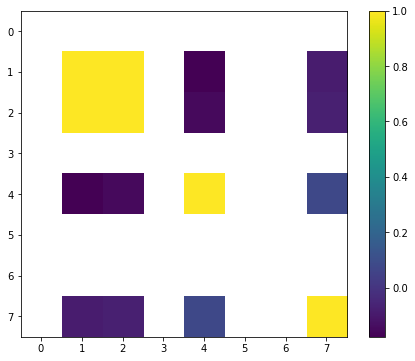

In [215]:
fig=mplot.figure(figsize=(8,6))
mplot.imshow(vals.values)
mplot.colorbar()
mplot.show()

## Prediction on area and crop

#### Using linear regression finding the production prediction based on crop and area

NOTE: Prediction of data is based on crop and area
    Based on crop selection and area you can predict the harvest quantity (production) data
    
Here I have used crop "Banana" and area "8" 

then you can expect a approx Production for crop in that particular area.

In [ ]:
# import pandas as pd
from sklearn import linear_model

#loading csv file
data=pd.read_csv("./AgriData/newdata.csv")
crop=input("Enter crop name: ")
# assigning each crop and area values
x=data[data['Crop']==crop]['Area']
y=data[data['Crop']==crop]['Production']

#linear_model to predict the production data
regr=linear_model.LinearRegression()
regr.fit(x.values.reshape(-1, 1),y.values.reshape(-1,1))
coeff=regr.coef_
ar=float(input("\nEnter the value of area: "))
prod=coeff*ar
print("Production will be approx: ",prod)

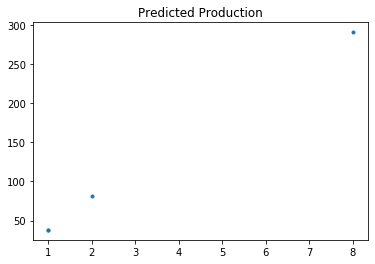

In [238]:
#ploting it in graph
mplot.plot(x,y,'.')
mplot.title('Predicted Production')
mplot.show()

#### Finding the crops that have reduction in production over the years

#### This will signify what crops are going be be rarely produced in future

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

data_set = data.fillna(0).groupby(['Crop','Crop_Year']).agg('mean').reset_index()
dicts = {}
for crop in data_set['Crop'].unique():
    
    X = data_set[data_set['Crop'] == crop]['Crop_Year'].values.reshape(-1,1)
    Y = data_set[data_set['Crop'] == crop]['Production'].values
    if(X.shape[0] > 5):
        linmodel = LR()
        linmodel.fit(X,Y)
        w = linmodel.coef_[0]
        dicts[crop] = [w]
#         print(w)

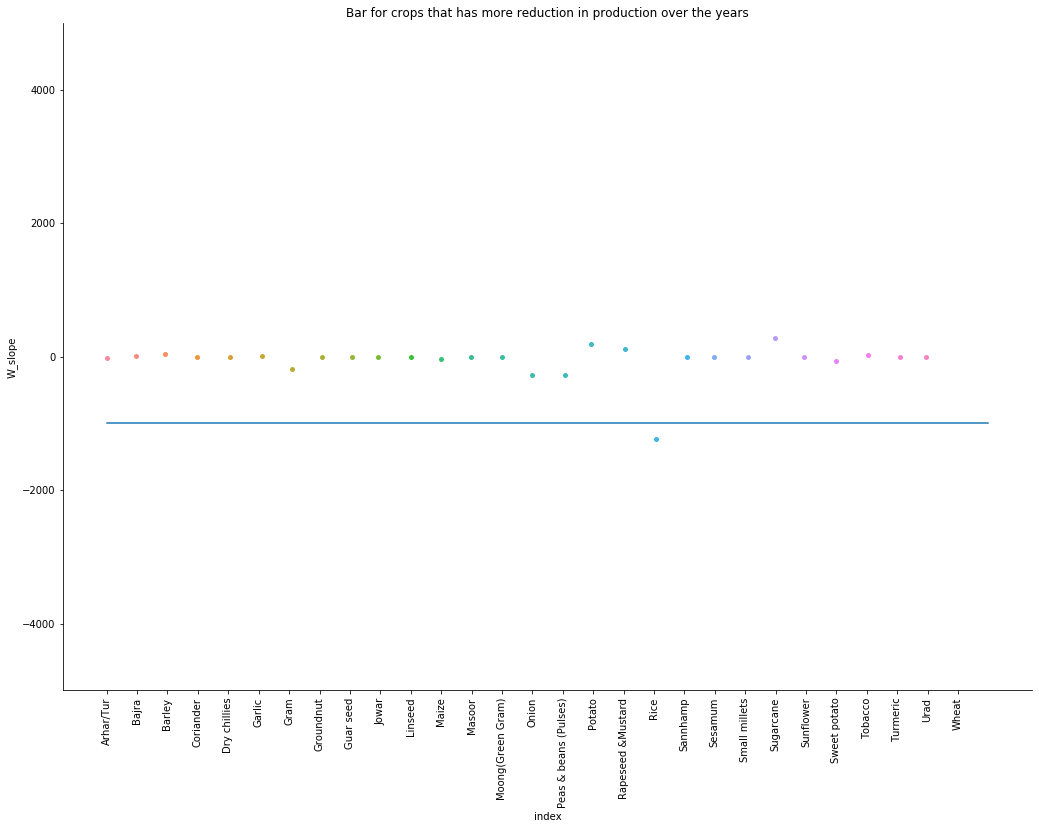

In [240]:

slope_data = pd.DataFrame(dicts).T.reset_index().rename(columns = {0:'W_slope'})
sns.catplot(x='index', y='W_slope', data = slope_data,  height=10, aspect=12/8.27);
plt.ylim(-5000,5000)
plt.xticks(rotation='vertical')
plt.plot([0,slope_data.shape[0]],[-1000,-1000])
plt.title('Bar for crops that has more reduction in production over the years')
# plt.savefig('Figures/Crops_reduction')
plt.show()